<a href="https://colab.research.google.com/github/KILjungjoon/Project_Asian_Parliament/blob/main/HK_Question2019vs2020Analysis(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
f = open('/content/drive/MyDrive/★Project_prof.Jang/Hong Kong/data/question2019.txt', 'r', encoding='utf-8')
ques2019=f.read().strip()

f = open('/content/drive/MyDrive/★Project_prof.Jang/Hong Kong/data/question2020.txt', 'r', encoding='utf-8')
ques2020=f.read().strip()
f.close()

print(ques2019.count(" ")+1, ques2020.count(" ")+1)

192433 169035


In [34]:
# TextBlob Lemmatizer with appropriate POS tag
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
# basic preprocessing
import re
re01=re.sub("[^0-9a-zA-Z]", " ", ques2019)    # 문자, 기호 제거
ques2019_spc=' '.join(re01.split())           # 2칸 이상 공백 제거

re02=re.sub("[^0-9a-zA-Z]", " ", ques2020)    # 문자, 기호 제거
ques2020_spc=' '.join(re02.split())           # 2칸 이상 공백 제거

In [36]:
# tokenizing
tokens2019=ques2019_spc.split(' ')
print(len(tokens2019))
tokens2020=ques2020_spc.split(' ')
print(len(tokens2020))

199474
175635


In [49]:
## Lemmatization

# Define function to lemmatize each word with its POS tag
from textblob import TextBlob, Word
import nltk
nltk.download('averaged_perceptron_tagger')

# Define lemmatization function
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return lemmatized_list

str2019=' '.join(tokens2019)
str2019=str2019.lower()
lemmatokens2019=lemmatize_with_postag(str2019)

str2020=' '.join(tokens2020)
str2020=str2020.lower()
lemmatokens2020=lemmatize_with_postag(str2020)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [22]:
# 일반 tokens
print(tokens2019)

['The', 'General', 'Secretary', 'of', 'the', 'Central', 'Committee', 'of', 'the', 'Communist', 'Party', 'of', 'China', 'CPC', 'pointed', 'out', 'in', 'a', 'report', 'delivered', 'at', 'the', '19th', 'CPC', 'National', 'Congress', 'that', 'well', 'ordered', 'steps', 'must', 'be', 'taken', 'to', 'advance', 'democracy', 'in', 'Hong', 'Kong', 'SAR', 'Besides', 'Articles', '45', 'and', '68', 'of', 'the', 'Basic', 'Law', 'stipulate', 'that', 'the', 'ultimate', 'aim', 'of', 'selecting', 'the', 'Chief', 'Executive', 'CE', 'and', 'electing', 'all', 'the', 'members', 'of', 'the', 'Legislative', 'Council', 'LegCo', 'by', 'universal', 'suffrage', 'dual', 'universal', 'suffrage', 'shall', 'be', 'achieved', 'in', 'the', 'light', 'of', 'the', 'actual', 'situation', 'in', 'Hong', 'Kong', 'SAR', 'and', 'in', 'accordance', 'with', 'the', 'principle', 'of', 'gradual', 'and', 'orderly', 'progress', 'In', 'December', '2013', 'which', 'was', '33', 'months', 'away', 'from', 'the', 'general', 'election', 'for

In [50]:
# 표제어화된 tokens
print(lemmatokens2019)

['the', 'general', 'secretary', 'of', 'the', 'central', 'committee', 'of', 'the', 'communist', 'party', 'of', 'china', 'cpc', 'point', 'out', 'in', 'a', 'report', 'deliver', 'at', 'the', '19th', 'cpc', 'national', 'congress', 'that', 'well', 'order', 'step', 'must', 'be', 'take', 'to', 'advance', 'democracy', 'in', 'hong', 'kong', 'sar', 'besides', 'article', '45', 'and', '68', 'of', 'the', 'basic', 'law', 'stipulate', 'that', 'the', 'ultimate', 'aim', 'of', 'select', 'the', 'chief', 'executive', 'ce', 'and', 'elect', 'all', 'the', 'member', 'of', 'the', 'legislative', 'council', 'legco', 'by', 'universal', 'suffrage', 'dual', 'universal', 'suffrage', 'shall', 'be', 'achieve', 'in', 'the', 'light', 'of', 'the', 'actual', 'situation', 'in', 'hong', 'kong', 'sar', 'and', 'in', 'accordance', 'with', 'the', 'principle', 'of', 'gradual', 'and', 'orderly', 'progress', 'in', 'december', '2013', 'which', 'be', '33', 'month', 'away', 'from', 'the', 'general', 'election', 'for', 'the', 'sixth', 

In [51]:
# stopwords 제거
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

clean2019 = []
for word in lemmatokens2019: 
    if word not in stop_words: 
        clean2019.append(word) 

print('2019 불용어 제거 전 :',len(lemmatokens2019))
print('2019 불용어 제거 후 :',len(clean2019))

clean2020 = []
for word in lemmatokens2020: 
    if word not in stop_words: 
        clean2020.append(word) 

print('2020 불용어 제거 전 :',len(lemmatokens2020))
print('2020 불용어 제거 후 :',len(clean2020))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2019 불용어 제거 전 : 199492
2019 불용어 제거 후 : 109441
2020 불용어 제거 전 : 175658
2020 불용어 제거 후 : 96794


In [58]:
# 파일 저장
clean2020=' '.join(clean2020)
f = open('/content/drive/MyDrive/★Project_prof.Jang/Hong Kong/data/clean2020.txt', 'w')
f.write(clean2020)
f.close()

* Show High Frequent Words & N-grams

[Text(0.5, 1.0, '2020 frequent trigrams')]

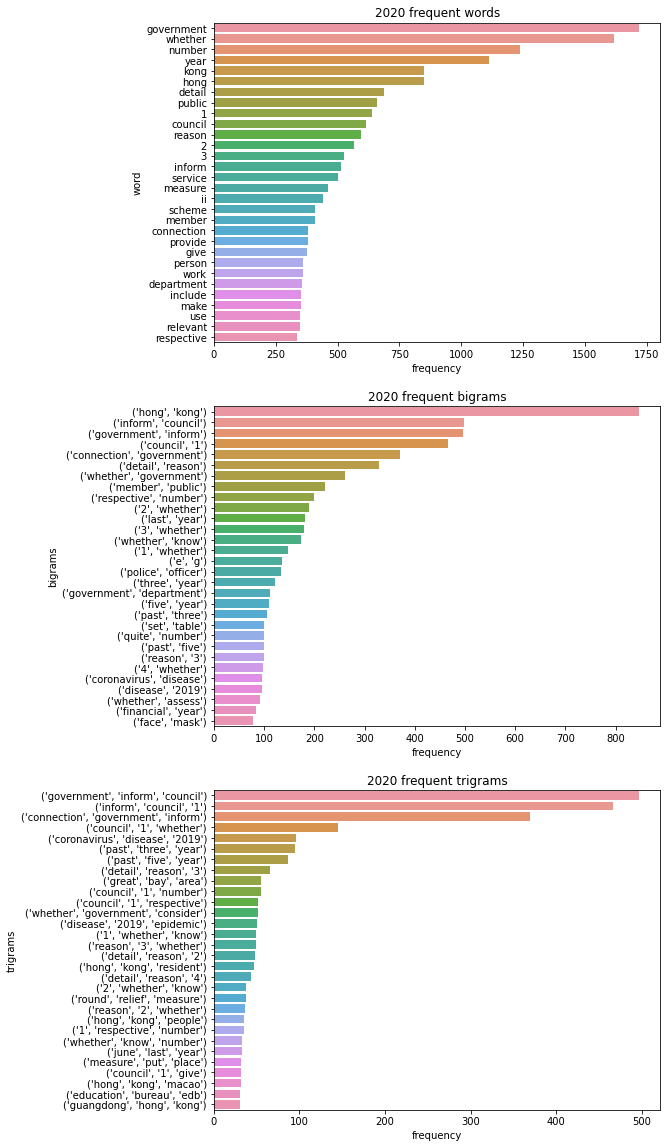

In [55]:
from collections import Counter
from nltk import ngrams
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#counts the words, bigrams and trigrams
counted = Counter(clean2020)
counted_2= Counter(ngrams(clean2020,2))
counted_3= Counter(ngrams(clean2020,3))

#creates 3 data frames and returns thems
unigrams = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
bigrams =pd.DataFrame(counted_2.items(),columns=['bigrams','frequency']).sort_values(by='frequency',ascending=False)
trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency' ,ascending=False)

# create subplot of the different data frames
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=unigrams.head(30)).set(title='2020 frequent words')
sns.barplot(ax=axes[1],x='frequency',y='bigrams',data=bigrams.head(30)).set(title='2020 frequent bigrams')
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=trigrams.head(30)).set(title='2020 frequent trigrams')